## Prashant Mishra(231110036)
## ML Assignment 2
## Problem-5-part-1

### Loading dataset

In [106]:
import numpy as np
import matplotlib.pyplot as plt
ridge_train = np.genfromtxt("data/ridgetrain.txt",delimiter=None)
# print(ridge_train)
ridge_test = np.genfromtxt("data/ridgetest.txt",delimiter=None)
# print(ridge_test)

### Kernal ridge regression

#### For prediction using kernal ridge regression using formula $y_{*}= \sum_{i=1}^{N}\alpha_{i}k(x_{*},x_{i})$, where $\alpha_{i}=(K+\lambda I_{N})^{-1}y$

In [107]:
# Define the Gaussian kernel function
def gaussian_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y)**2)

# Define function for RMSE
def RMSE(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) between true and predicted data.
    """
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

# Calculating Matrix K
def mat_K(X,gamma):
    X_trans=X.T
    row,col=X.shape
    result = np.zeros((row,row)) #result of X.X^T
    for i in range(row):
        for j in range(row):
            result[i][j]=sum(gaussian_kernel(X[i][k],X_trans[k][j],gamma) for k in range(col))
    return result

# Calculating alpha vectors ,that will be used in predictions
def alphas(X,y,gamma,lamda=1.0,):
    K=mat_K(X,gamma)
#     print("K size:",K.shape)  # K matrix size should be N*N
    size,temp = y.shape
    return np.dot(np.linalg.inv(K+lamda*(np.eye(size))),y)

# Training part 
gamma=0.1         #gamma value set to 0.1
lmbda=0.1         #lambda value set to 0.1
train_ip=ridge_train[:,0].reshape(-1,1)
train_op=ridge_train[:,1].reshape(-1,1)

alpha = alphas(train_ip,train_op,gamma,lmbda)
# print(len(alpha))

# Prediction 
y_true = ridge_test[:,1].reshape(-1,1)
y_pred = np.zeros(y_true.shape)

test_train_ip = ridge_test[:,0]
for i,x in enumerate(test_train_ip):
      y_pred[i]=sum(alpha[j]*gaussian_kernel(x,x_train,gamma) for j,x_train in enumerate(train_ip))

print(len(y_pred),len(y_true))
# print(max(y_pred))

250 250


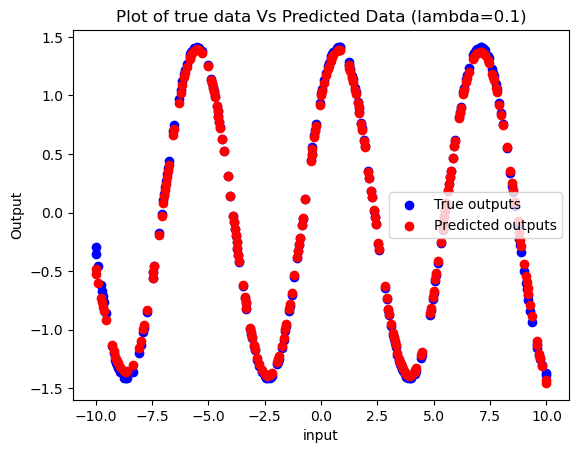

The RMSE on the test Data is: 0.032577670293576125


In [108]:
test_ip = test_ip.reshape(-1,1)   #test_ip contains test input data

# Scatter plot for true data
plt.scatter(test_ip, y_true,color='blue', label='True outputs')
# Scatter plot for predicted data
plt.scatter(test_ip, y_pred,color='red', label='Predicted outputs')

plt.xlabel('input')
plt.ylabel('Output')
plt.title('Plot of true data Vs Predicted Data (lambda=0.1)')

plt.legend()
plt.show()

print("The RMSE on the test Data is:", RMSE(y_true,y_pred))

### Repeating this process for lambda=1,10,100

Plot for lambda = 1


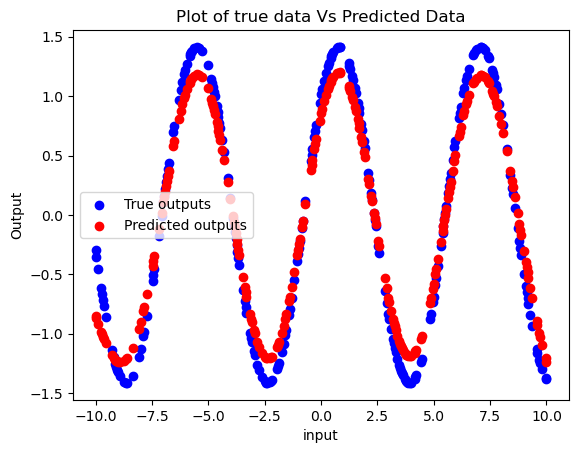

The RMSE on the test Data is: 0.17030390344202556 


Plot for lambda = 10


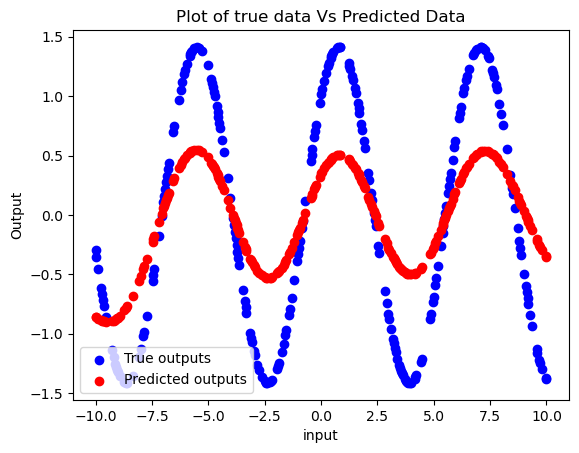

The RMSE on the test Data is: 0.6092671596540067 


Plot for lambda = 100


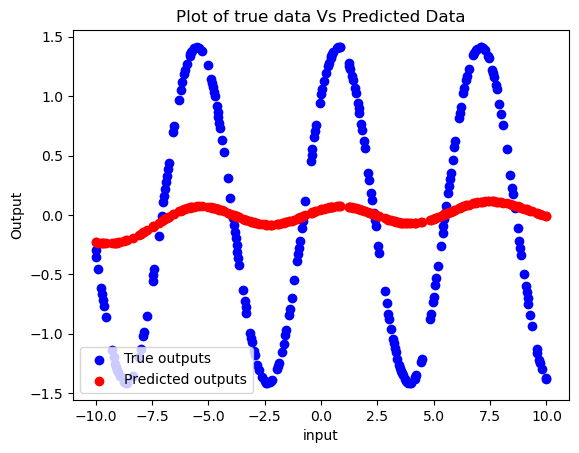

The RMSE on the test Data is: 0.9110858052767243 




In [109]:
lmbda_list=[1,10,100]
for lmbda in lmbda_list:
    alpha = alphas(ip,op,gamma,lmbda)
    y_pred = np.zeros(y_true.shape)
    for i,x in enumerate(ridge_test[:,0]):
        y_pred[i]=sum(alpha[j]*gaussian_kernel(x,x_train,gamma) for j,x_train in enumerate(ip))
        
    #     plot for each case-->
    
    # Scatter plot for true data
    plt.scatter(test_ip, y_true,color='blue', label='True outputs')
    # Scatter plot for predicted data
    plt.scatter(test_ip, y_pred,color='red', label='Predicted outputs')
    
    plt.xlabel('input')
    plt.ylabel('Output')
    print('Plot for lambda =',lmbda)
    plt.title('Plot of true data Vs Predicted Data')
    
    plt.legend()
    plt.show()
    
    print("The RMSE on the test Data is:", RMSE(y_true,y_pred),"\n\n")

### Observations:
lambda = 1: The RMSE on the test Data is: 0.17030390344202556 ,

lambda = 10: The RMSE on the test Data is: 0.6092671596540067,

lambda = 100: The RMSE on the test Data is: 0.9110858052767243 

The Plots are containing blue points for actual value and red point for predicted value and it is clearly noticible that at lambda=1 the predicted values are much aligned with true values hence i can say that lambda=1 is a good regularization parameter for this model, Also on increasing the value of lambda prediction graph is deviating more from true values and predicted values are shrinking because of large regularization in weights. Moreover for lambda=1 the RMSE on the test Data is least (0.17030390344202556).

### Landmark-ridge

#### Taking 'L' landmarks from training data (with no repeatition) and transforming input featurs based on these(using RBF Kernal) and during test time test inputs are also transformed using these landmarks

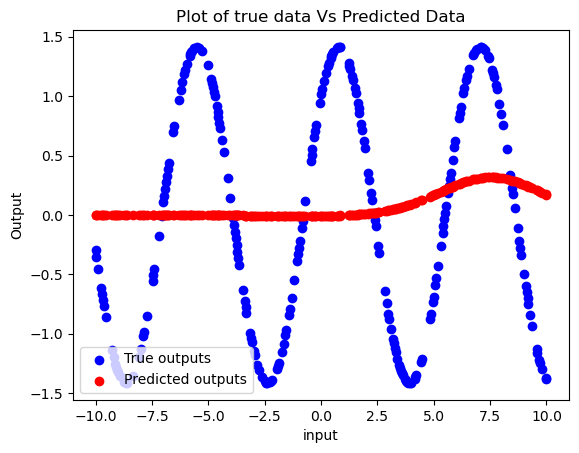

The RMSE on the test Data is: 0.9690750300999605 and num_of_landmarks are:  2 




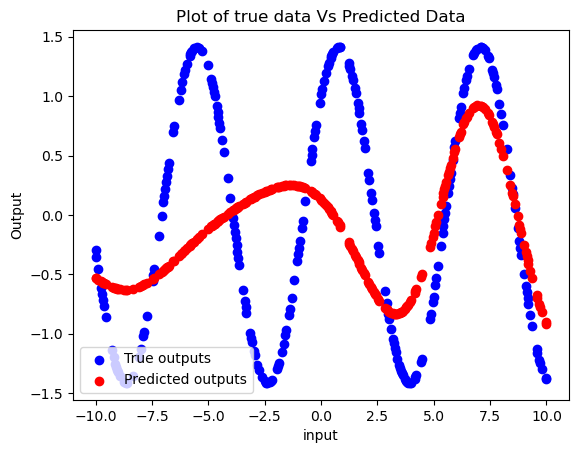

The RMSE on the test Data is: 0.8524862508762331 and num_of_landmarks are:  5 




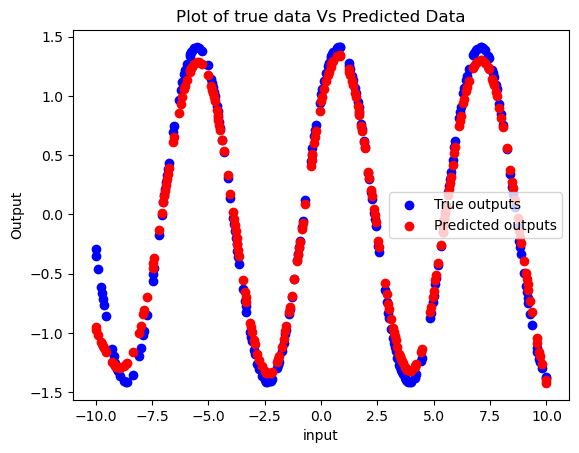

The RMSE on the test Data is: 0.11519829830936927 and num_of_landmarks are:  20 




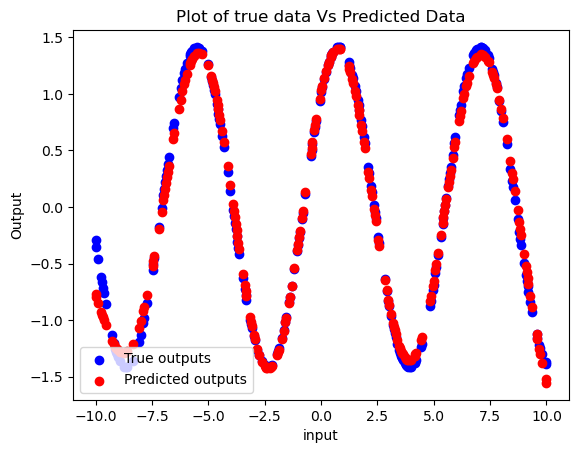

The RMSE on the test Data is: 0.07973476512271252 and num_of_landmarks are:  50 




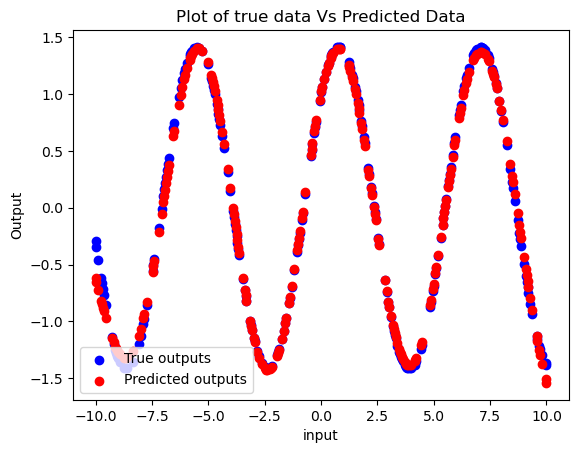

The RMSE on the test Data is: 0.05319657388296402 and num_of_landmarks are:  100 




In [116]:
# Function for ridge_regression weight calculation
def ridge_regression(X, y, lamb):
    identity = np.identity(X.shape[1])
    # w = (X'X + lambda*I)^-1 
    w = np.linalg.inv(X.T.dot(X) + lamb * identity).dot(X.T).dot(y)
    return w

num_of_landmarks = [2,5,20,50,100]
gamma=0.1           #gamma is fixed to 0.1
for size in num_of_landmarks:
    landmarks = np.random.choice(train_ip.reshape(-1),size,replace=False)
    transformed_ip=[]   #list for new data with landmarks number of features
    for data in train_ip:
        temp=[]    #temp list for all features of a datapoint, later appended in 'transformed_ip' list
        for landmark in landmarks:
            temp.append(gaussian_kernel(landmark,data,gamma))
        transformed_ip.append(temp)
    transformed_ip=np.array(transformed_ip)
    # print(transformed_ip)     
    
    #calculate weight learned by ridge reg model
    weight_vector=ridge_regression(transformed_ip,train_op,lamb=0.1)
    
    #generating features for test data(test_ip)
    transformed_ip = []
    for data in test_ip:    #test_ip contains test input data
        temp=[]    #temp list for all features of a datapoint, later appended in 'transformed_ip' list
        for landmark in landmarks:
            temp.append(gaussian_kernel(landmark,data,gamma))
        transformed_ip.append(temp)
    transformed_ip=np.array(transformed_ip)
    #prediction 
    y_pred = transformed_ip.dot(weight_vector)
    
    #Plotting 
    # Scatter plot for true data
    plt.scatter(test_ip, y_true,color='blue', label='True outputs')
    # Scatter plot for predicted data
    plt.scatter(test_ip, y_pred,color='red', label='Predicted outputs')
    
    plt.xlabel('input')
    plt.ylabel('Output')
    plt.title('Plot of true data Vs Predicted Data')
    
    plt.legend()
    plt.show()
    
    print("The RMSE on the test Data is:", RMSE(y_true,y_pred),"and num_of_landmarks are: ",size,"\n\n")
    


###  Observations:
The number of landmarks are: 2  and respective RMSE is 0.9690750300999605,

The number of landmarks are: 5  and respective RMSE is 0.8524862508762331,

The number of landmarks are: 20  and respective RMSE is 0.11519829830936927,

The number of landmarks are: 50  and respective RMSE is 0.07973476512271252,

The number of landmarks are: 100 and respective RMSE is 0.05319657388296402

From the plots it is easily noticible that the prediction is getting better on selecting more number of landmarks this is essentially because of more landmarks are increasing the featues that kernal ridge regression takes as input and more features allows the model to capture more complex patterns in the data. The use of landmarks, combined with the Gaussian kernel, transforms the original feature space into a higher-dimensional space where the data may be more separable.

When i choose more landmarks, the transformed data becomes richer in information, potentially leading to better separation of clusters. Each landmark serves as a reference point, and the Gaussian kernel assigns higher weights to data points closer to these landmarks, emphasizing their influence on the clustering.

However, it's essential to strike a balance. Adding too many landmarks may lead to overfitting, As far as this model is concerned 100 numbers of landmarks are performing better than all tried number of landmarks.